# Data Preparation and Analysis for Emotion-Color Dataset


## 1. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

## 2. Load and Inspect Initial Dataset


In [20]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Remove any leading or trailing whitespace
data.columns = data.columns.str.strip()
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Print dataset information
print("\nDataset shape:", data.shape)
print("Unique emotions:", data['Emotion'].unique())
print("Number of unique emotions:", data['Emotion'].nunique())
print("Emotion distribution:\n", data['Emotion'].value_counts())

    Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  RGB3_G  \
0    Bright     229       0      13     225     225     255     253     166   
1   Festive     229       0      13     225     225     255     255     242   
2    Lively     229       0      13     225     225     255      26      67   
3       Hot     229       0      13     138     112      12     255     242   
4  Vigorous     229       0      13     255     242       0      12      32   

   RGB3_B  
0      74  
1       0  
2     155  
3       0  
4     120  

Missing values in each column:
Emotion    0
RGB1_R     0
RGB1_G     0
RGB1_B     0
RGB2_R     0
RGB2_G     0
RGB2_B     0
RGB3_R     0
RGB3_G     0
RGB3_B     0
dtype: int64

Dataset shape: (1069, 10)
Unique emotions: ['Bright' 'Festive' 'Lively' 'Hot' 'Vigorous' 'Bold' 'Forceful' 'Dynamic'
 'Dynamic and Active' 'Rich' 'Mature' 'Alluring' 'Untamed' 'Glossy'
 'Fascinating' 'Luxurious' 'Mellow' 'Sweet' 'Cheerful' 'Childlike'
 'Joyful' 'Merry' 'Colour

## 3. Visualize Initial Class Distribution


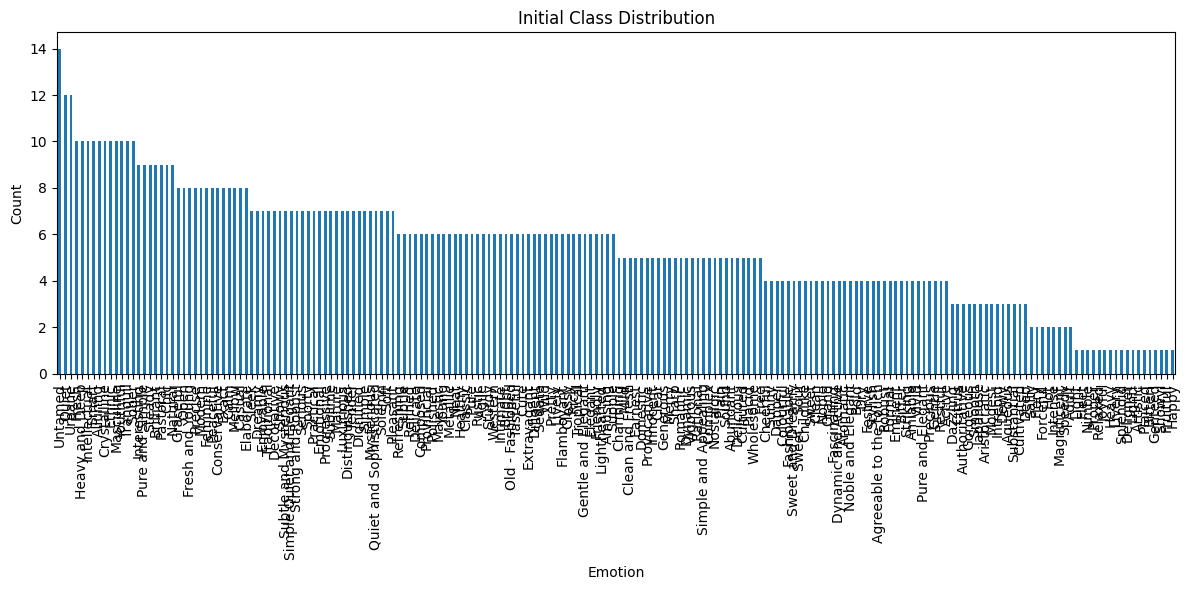

In [21]:
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Initial Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4. Data Cleaning and Preprocessing


In [22]:
# Remove emotions with more than one word
data['Emotion'] = data['Emotion'].apply(lambda x: x if len(x.split()) == 1 else '')
data = data[data['Emotion'] != '']

# Print updated dataset information
print("Dataset shape after cleaning:", data.shape)
print("Number of unique emotions after cleaning:", data['Emotion'].nunique())
print("Updated emotion distribution:\n", data['Emotion'].value_counts())

# Save the cleaned dataset
data.to_csv('cleaned_data1.csv', index=False)

Dataset shape after cleaning: (968, 10)
Number of unique emotions after cleaning: 181
Updated emotion distribution:
 Emotion
Untamed          14
Quiet            12
Urbane           12
Ethnic           10
Intellectual     10
Tranquil         10
Masculine        10
Smart            10
Youthful         10
Fresh            10
Sober            10
Crystalline      10
Alluring         10
Chic              9
Steady            9
Brilliant         9
Natural           9
Interesting       9
Pastoral          9
Precise           8
Conservative      8
Peaceful          8
Feminine          8
Exact             8
Casual            8
Graceful          8
Elaborate         8
Open              8
Mellow            8
Modern            8
Calm              8
Enjoyable         7
Solemn            7
Serious           7
Decorative        7
Distinguished     7
Traditional       7
Dreamy            7
Mysterious        7
Sporty            7
Showy             7
Dignified         7
Practical         7
Sleek          

## 5. Analyze Cleaned Dataset


Counts of each emotion:
Emotion
Untamed          14
Quiet            12
Urbane           12
Ethnic           10
Intellectual     10
Tranquil         10
Masculine        10
Smart            10
Youthful         10
Fresh            10
Sober            10
Crystalline      10
Alluring         10
Chic              9
Steady            9
Brilliant         9
Natural           9
Interesting       9
Pastoral          9
Precise           8
Conservative      8
Peaceful          8
Feminine          8
Exact             8
Casual            8
Graceful          8
Elaborate         8
Open              8
Mellow            8
Modern            8
Calm              8
Enjoyable         7
Solemn            7
Serious           7
Decorative        7
Distinguished     7
Traditional       7
Dreamy            7
Mysterious        7
Sporty            7
Showy             7
Dignified         7
Practical         7
Sleek             7
Soft              7
Sublime           7
Simple            7
Emotional         7
Progress

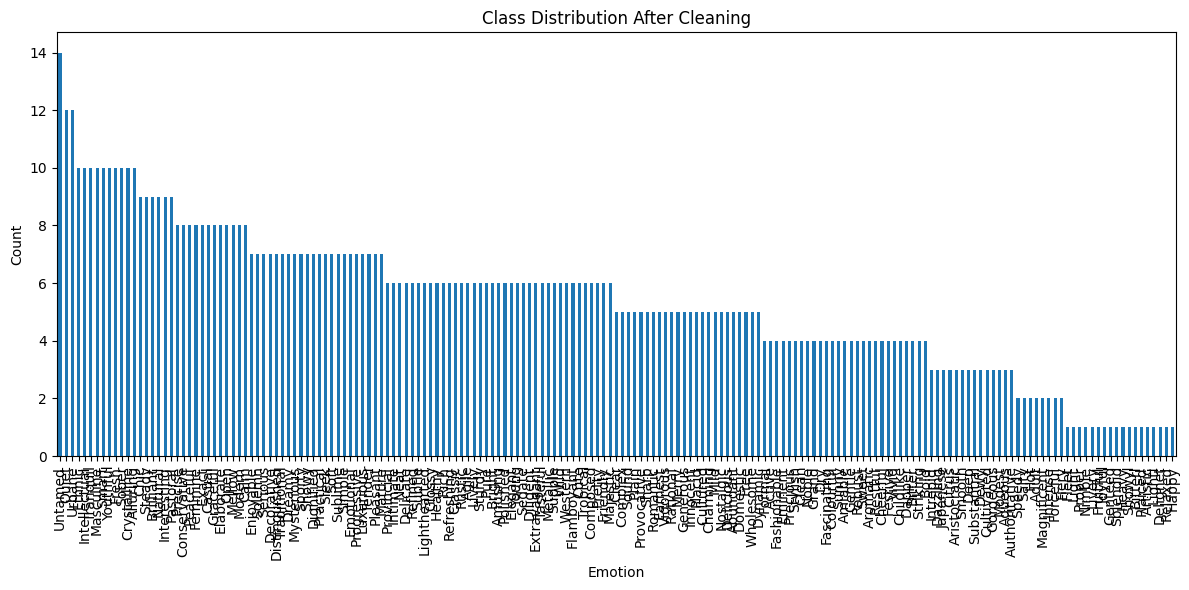

In [23]:
# Load the cleaned dataset
data1 = pd.read_csv('cleaned_data1.csv')

# Display emotion counts
print("Counts of each emotion:")
print(data1['Emotion'].value_counts())

# Plot updated class distribution
plt.figure(figsize=(12, 6))
data1['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution After Cleaning')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Counts of each emotion:
Emotion
Untamed     14
Simple      14
Urbane      12
Fresh       11
Young       11
            ..
Livery       1
Joyful       1
Fruitful     1
Relaxed      1
Happy        1
Name: count, Length: 182, dtype: int64


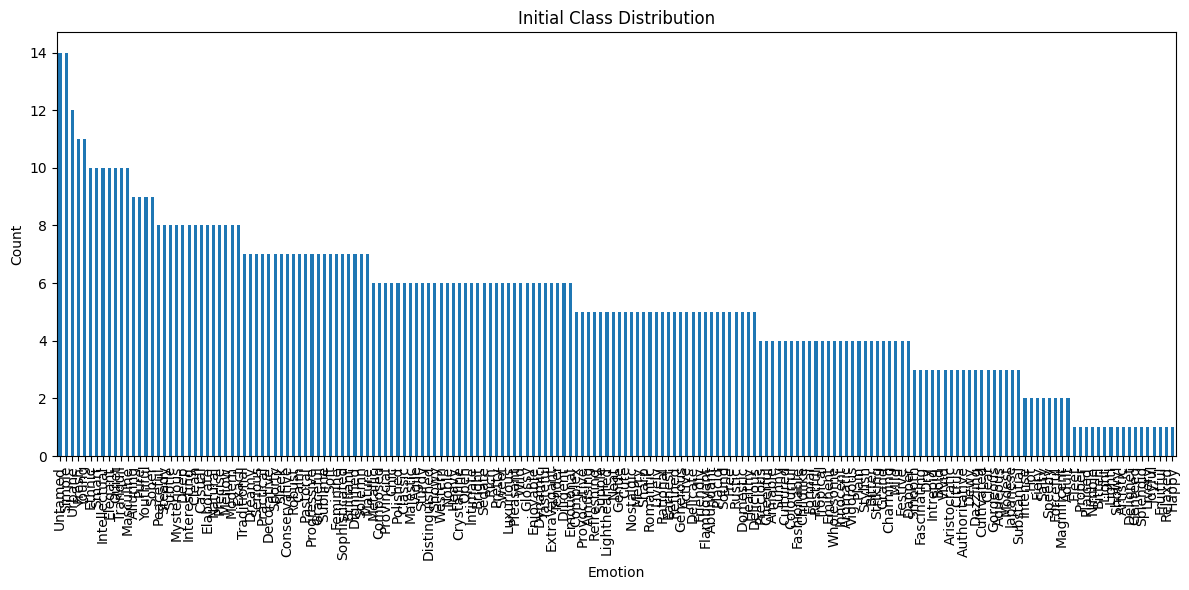

In [4]:
# Load the cleaned dataset
datax = pd.read_csv('increase_data.csv')

# Display emotion counts
print("Counts of each emotion:")
print(datax['Emotion'].value_counts())

# Plot updated class distribution
plt.figure(figsize=(12, 6))
datax['Emotion'].value_counts().plot(kind='bar')
plt.title('Initial Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 6. Further Expansion: Multiply RGB Positions


In [26]:
# Load the dataset
data = pd.read_csv('increase_data.csv')

# Function to create new combinations
def create_combinations(emotion, rgb1, rgb2, rgb3):
    return [
        [emotion] + rgb1 + rgb3 + rgb2,
        [emotion] + rgb2 + rgb1 + rgb3,
        [emotion] + rgb2 + rgb3 + rgb1,
        [emotion] + rgb3 + rgb1 + rgb2,
        [emotion] + rgb3 + rgb2 + rgb1
    ]

# Create new combinations for all samples
new_rows = []
for index, row in data.iterrows():
    emotion = row['Emotion']
    rgb1 = [row['RGB1_R'], row['RGB1_G'], row['RGB1_B']]
    rgb2 = [row['RGB2_R'], row['RGB2_G'], row['RGB2_B']]
    rgb3 = [row['RGB3_R'], row['RGB3_G'], row['RGB3_B']]
    new_rows.extend(create_combinations(emotion, rgb1, rgb2, rgb3))

# Create a new DataFrame with the additional rows
new_data = pd.DataFrame(new_rows, columns=['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B'])

# Combine original and new data
combined_data = pd.concat([data, new_data], ignore_index=True)

# Save the expanded dataset
combined_data.to_csv('x6perfect.csv', index=False)

print(f"Original data shape: {data.shape}")
print(f"New data shape: {new_data.shape}")
print(f"Combined data shape: {combined_data.shape}")

Original data shape: (962, 10)
New data shape: (4810, 10)
Combined data shape: (5772, 10)


## 7. Check for Duplicates in Expanded Dataset


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('x6perfect.csv')

# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Sort duplicates to group them together
duplicates_sorted = duplicates.sort_values(by=list(df.columns))

# Print the count of duplicated rows
print(f"Number of duplicated rows: {len(duplicates)}")

# Remove duplicates, keeping the last occurrence
df_cleaned = df.drop_duplicates(keep='last')

# Print the shape of the original and cleaned dataframes
print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('x6perfect_cleaned.csv', index=False)
print("Cleaned data saved to 'x6perfect_cleaned.csv'")

Number of duplicated rows: 414
Original dataframe shape: (5772, 10)
Cleaned dataframe shape: (5562, 10)
Cleaned data saved to 'x6perfect_cleaned.csv'


## 8. Remove Specific Emotions

Some emotions in our dataset may not contribute significantly to understanding the emotional impact of artwork. We'll remove these to focus on more relevant emotional descriptors.


In [ ]:
import pandas as pd

# Read the original CSV file
data4 = pd.read_csv('x6perfect_cleaned.csv')

# List of emotions to remove
emotions_to_remove = [
    "Japanese", "Aqueous", "Sober", "Sound", "Showyl", "Plaiced", "Delignet",
    "Livery", "Western", "Urbane", "Dewy", "Exact", "Salty", "Smart", "Clean",
    "Practical", "Sporty", "Efficient", "Technical", "Functional", "Durable",
    "Convenient", "Precise", "Handy", "Professional", "Steady", "Proper"
]

# Remove rows with the specified emotions
data_cleaned = data4[~data4['Emotion'].isin(emotions_to_remove)]

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('x6perfect_cleaned_remove.csv', index=False)

# Count the number of occurrences of each distinct emotion
emotion_counts = data_cleaned['Emotion'].value_counts()
print("Counts of each emotion:")
print(emotion_counts)

print(f"\nTotal rows in original dataset: {len(data4)}")
print(f"Total rows in cleaned dataset: {len(data_cleaned)}")
print(f"Rows removed: {len(data4) - len(data_cleaned)}")

Counts of each emotion:
Emotion
Untamed     84
Simple      81
Young       66
Fresh       66
Elegant     60
            ..
Splendid     6
Genteed      6
Relaxed      6
Joyful       6
Happy        6
Name: count, Length: 162, dtype: int64

Total rows in original dataset: 5562
Total rows in cleaned dataset: 4950
Rows removed: 612


## 9. Visualize Updated Class Distribution

Let's visualize the class distribution after removing specific emotions.


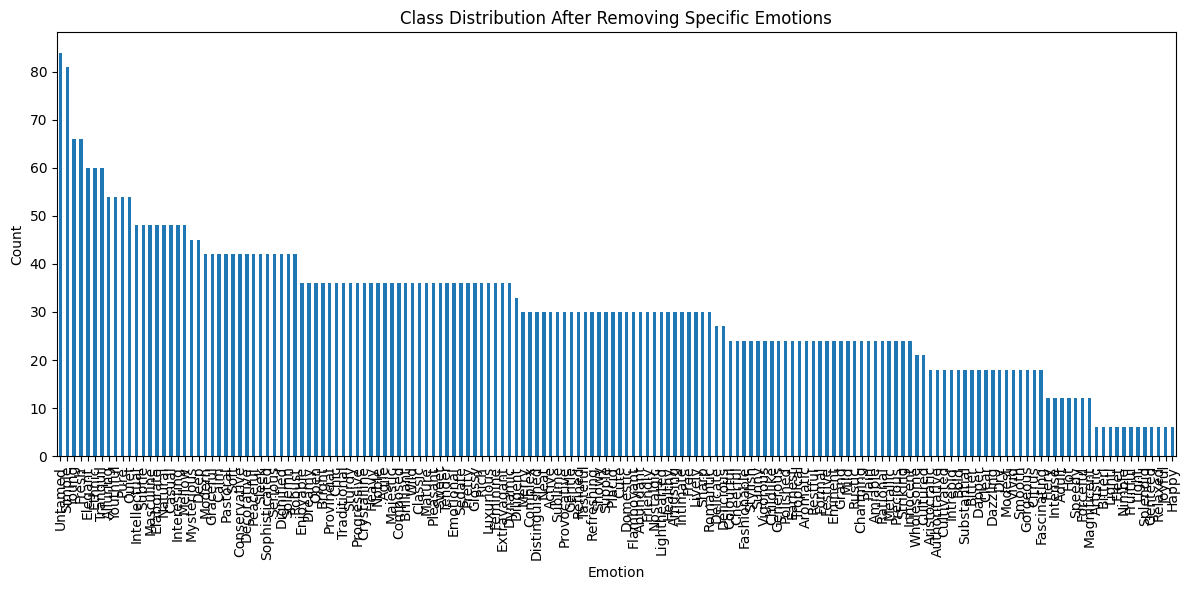

In [29]:
plt.figure(figsize=(12, 6))
data_cleaned['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution After Removing Specific Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 10.Helper Functions

We'll define some helper functions to assist in our data preparation and oversampling process.


In [30]:
# Calculates a safe number of neighbors for the SMOTE. 
# Returns the minimum between (minimum class size - 1) and 5. 
# This ensures that the SMOTE will have enough neighbors to work, even for very small classes.
def get_safe_k_neighbors(y):
    class_counts = Counter(y)
    min_count = min(class_counts.values())
    return max(1, min(min_count - 1, 5))

# It assesses the balance of classes using the coefficient of variation. 
# A lower coefficient indicates a better balance between classes.
def evaluate_balance(class_distribution):
    counts = list(class_distribution.values())
    return np.std(counts) / np.mean(counts)  # Coefficient of variation

## 11. Load and Prepare the Dataset


In [36]:
# Load the cleaned dataset
df = pd.read_csv('x6perfect_cleaned_remove.csv')

# Check for duplicated lines before removing them
initial_duplicates = df.duplicated().sum()
print(f"Number of duplicated lines before removal: {initial_duplicates}")

# Remove duplicated lines
df.drop_duplicates(inplace=True)

# Check for duplicated lines after removing them
final_duplicates = df.duplicated().sum()
print(f"Number of duplicated lines after removal: {final_duplicates}")

# Separate features and target
X = df.drop('Emotion', axis=1)
y = df['Emotion']

# Print initial dataset information
print(f"Dataset shape after removing specific emotions: {df.shape}")
print(f"Number of unique emotions: {y.nunique()}")
print("\nUpdated class distribution:")
print(y.value_counts())

Number of duplicated lines before removal: 0
Number of duplicated lines after removal: 0
Dataset shape after removing specific emotions: (4950, 10)
Number of unique emotions: 161

Updated class distribution:
Emotion
Pure_Simplicity    135
Untamed             84
Young               66
Fresh               66
Ethnic              60
Tranquil            60
Elegant             60
Alluring            54
Youthful            54
Quiet               54
Intellectual        48
Masculine           48
Elaborate           48
Casual              48
Interesting         48
Mellow              48
Subtle              48
Natural             48
Deep                45
Mysterious          45
Calm                42
Conservative        42
Decorative          42
Pastoral            42
Sleek               42
Graceful            42
Serious             42
Soft                42
Robust              42
Solemn              42
Dignified           42
Peaceful            42
Modern              42
Sophisticated       42
Br

## 12. Implement SMOTETomek Oversampling

We'll use SMOTETomek to oversample our minority classes and undersample the majority classes, creating a more balanced dataset.


In [37]:
# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_fold = None
best_balance = float('inf')
best_resampled_data = None
best_distribution = None

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Get safe k_neighbors value
    k_neighbors = get_safe_k_neighbors(y_train)
    print(f"Fold {fold}: Using k_neighbors = {k_neighbors}")
    
    # Apply SMOTETomek
    try:
        # Use SMOTE to oversample the minority classes with a safe number of neighbors
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        # Use SMOTETomek 
        smote_tomek = SMOTETomek(smote=smote, random_state=42)
        # Implement SMOTETomek in the training data
        X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error in fold {fold}: {str(e)}")
        print("Falling back to SMOTE only")
        # Use SMOTE only if SMOTETomek fails
        smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
    
    # Evaluate balance
    resampled_distribution = Counter(y_resampled)
    balance_score = evaluate_balance(resampled_distribution)
    print(f"Fold {fold}: Balance Score = {balance_score:.4f}")
    print(f"Original samples: {len(y_train)}, Resampled samples: {len(y_resampled)}")
    
    if balance_score < best_balance:
        best_balance = balance_score
        best_fold = fold
        best_resampled_data = (X_resampled, y_resampled)
        best_distribution = resampled_distribution

# Process the best result
print(f"\nBest result achieved in Fold {best_fold}")
print(f"Best Balance Score: {best_balance:.4f}")

Fold 1: Using k_neighbors = 3
Fold 1: Balance Score = 0.0172
Original samples: 3960, Resampled samples: 17170
Fold 2: Using k_neighbors = 3
Fold 2: Balance Score = 0.0143
Original samples: 3960, Resampled samples: 17232
Fold 3: Using k_neighbors = 3
Fold 3: Balance Score = 0.0156
Original samples: 3960, Resampled samples: 17196
Fold 4: Using k_neighbors = 3
Fold 4: Balance Score = 0.0170
Original samples: 3960, Resampled samples: 17186
Fold 5: Using k_neighbors = 3
Fold 5: Balance Score = 0.0143
Original samples: 3960, Resampled samples: 17204

Best result achieved in Fold 5
Best Balance Score: 0.0143


## 13. Analyze and Save the Resampled Dataset


In [38]:
# Inverse transform the scaled features
X_resampled_original = scaler.inverse_transform(best_resampled_data[0])

# Create a DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled_original, columns=X.columns),
                          pd.Series(best_resampled_data[1], name='Emotion')], axis=1)

# Ensure all feature values are integers in the 0-255 range
for col in X.columns:
    df_resampled[col] = df_resampled[col].round().clip(0, 255).astype(int)

# Save the best resampled dataset
df_resampled.to_csv('final_dataset_oversampled.csv', index=False)

print("\nResampled class distribution:")
print(Counter(best_resampled_data[1]))

# Calculate and print statistics
original_sample_count = len(y)
resampled_sample_count = len(best_resampled_data[1])
original_class_count = len(Counter(y))
resampled_class_count = len(best_distribution)

print("\nResampling Statistics:")
print(f"Original sample count: {original_sample_count}")
print(f"Resampled sample count: {resampled_sample_count}")
print(f"Sample increase: {resampled_sample_count - original_sample_count} ({(resampled_sample_count / original_sample_count - 1) * 100:.2f}%)")
print(f"Original number of classes: {original_class_count}")
print(f"Resampled number of classes: {resampled_class_count}")
print(f"Minimum class size before resampling: {min(Counter(y).values())}")
print(f"Minimum class size after resampling: {min(best_distribution.values())}")
print(f"Maximum class size before resampling: {max(Counter(y).values())}")
print(f"Maximum class size after resampling: {max(best_distribution.values())}")


Resampled class distribution:
Counter({'Festive': 108, 'Hot': 108, 'Forceful': 108, 'Mature': 108, 'Fascinating': 108, 'Luxurious': 108, 'Mellow': 108, 'Cheerful': 108, 'Joyful': 108, 'Bright': 108, 'Sunny': 108, 'Feminine': 108, 'Amiable': 108, 'Innocent': 108, 'Soft': 108, 'Genteed': 108, 'Emotional': 108, 'Calm': 108, 'Nostalgic': 108, 'Fruitful': 108, 'Substantial': 108, 'Wild': 108, 'Dazzling': 108, 'Tropical': 108, 'Enjoyable': 108, 'Delicious': 108, 'Aromatic': 108, 'Friendly': 108, 'Lighthearted': 108, 'Domestic': 108, 'Charming': 108, 'Dreamy': 108, 'Delicate': 108, 'Wholesome': 108, 'Provincial': 108, 'Traditional': 108, 'Pastoral': 108, 'Sturdy': 108, 'Free': 108, 'Plain': 108, 'Restful': 108, 'Bitterl': 108, 'Tasteful': 108, 'Bitter': 108, 'Artistic': 108, 'Citrus': 108, 'Lightl': 108, 'Diligent': 108, 'Deep': 108, 'Provocative': 108, 'Showy': 108, 'Relaxed': 108, 'Refreshing': 108, 'Progressive': 108, 'Clear': 108, 'Agile': 108, 'Sharp': 108, 'Magnificent': 108, 'Majestic

## 14. Visualize Class Distribution


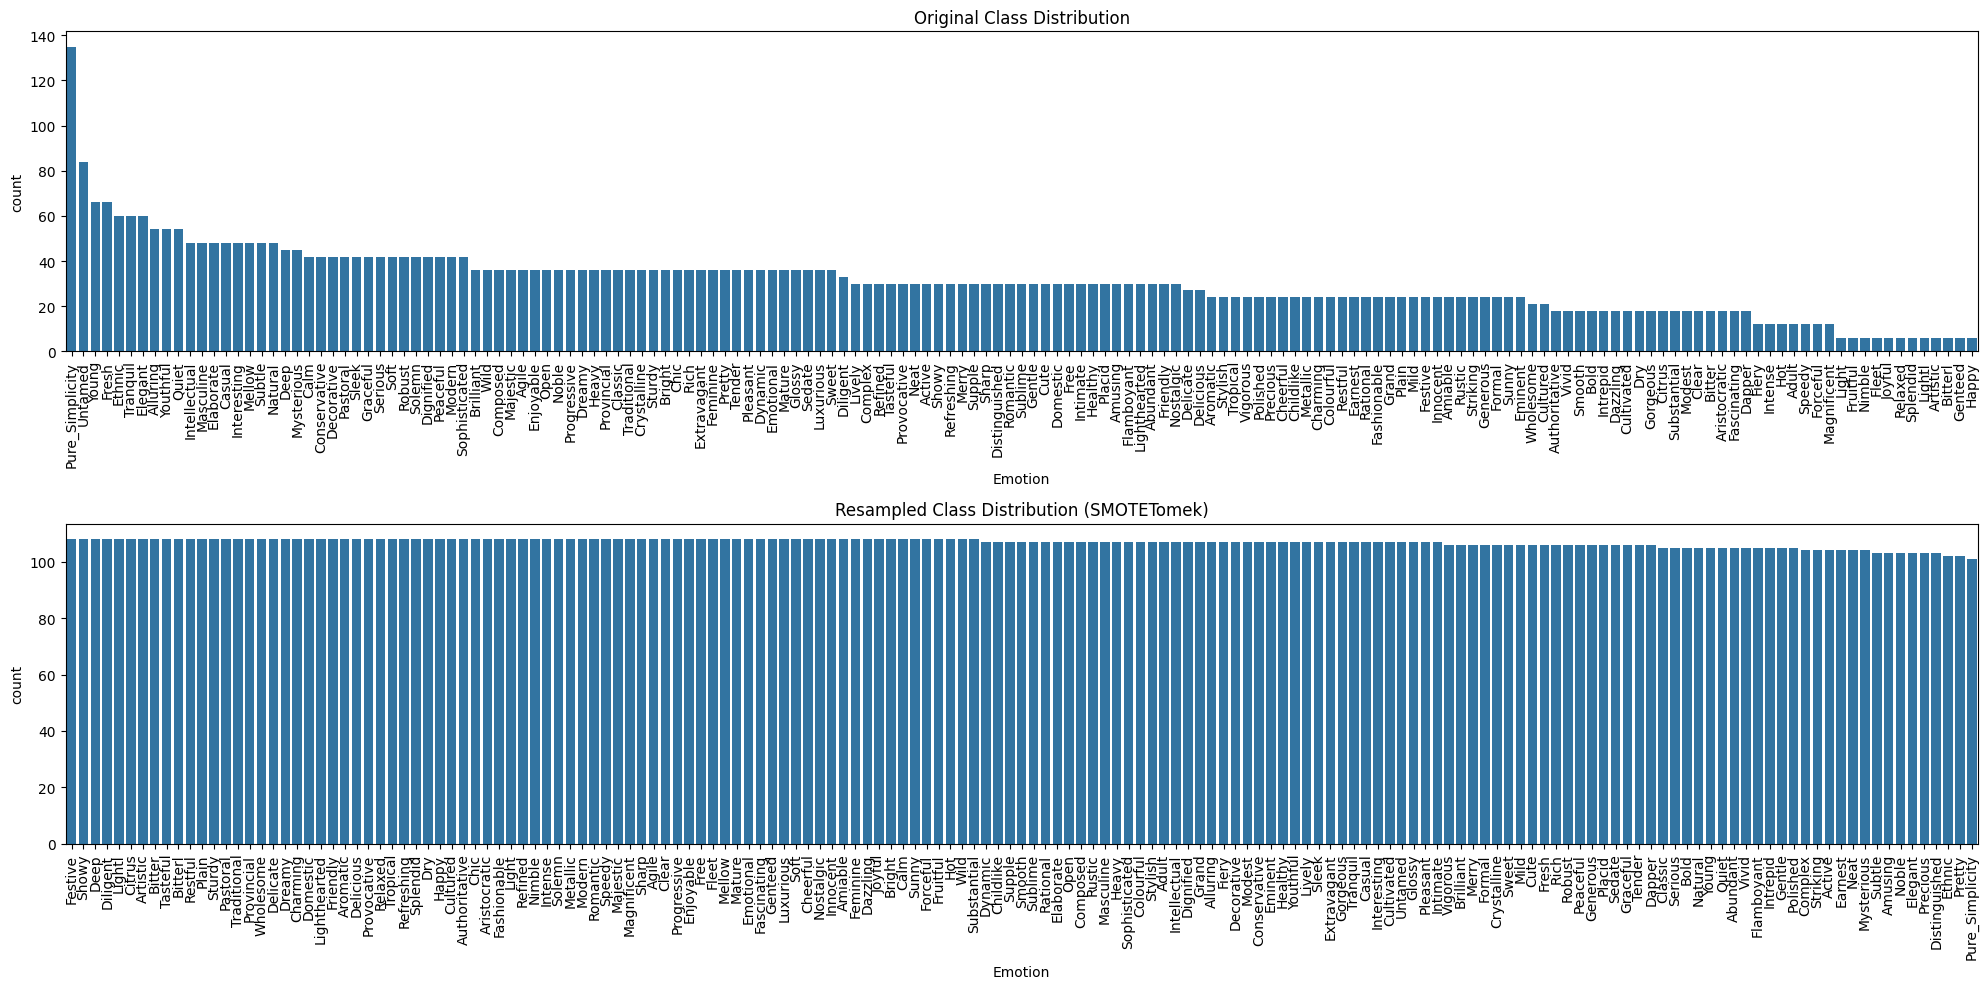


Resampling complete. Check the generated CSV file and distribution plot.


In [39]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Original Class Distribution')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=best_resampled_data[1], order=best_resampled_data[1].value_counts().index)
plt.title('Resampled Class Distribution (SMOTETomek)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('class_distribution_comparison.png')
plt.show()

print("\nResampling complete. Check the generated CSV file and distribution plot.")